In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 8
fig_height = 5
fig_format = 'png'
fig_dpi = 200
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/development/projects/active/HIRT/docs/hirt-whitepaper/sections':
  os.chdir(r'/development/projects/active/HIRT/docs/hirt-whitepaper/sections')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/usr/lib/python3.12/importlib/_bootstrap.py": 1767871850.0, "/usr/lib/python3.12/importlib/_bootstrap_external.py": 1767871850.0, "/usr/lib/python3.12/zipimport.py": 1767871850.0, "/usr/lib/python3.12/codecs.py": 1767871850.0, "/usr/lib/python3.12/encodings/aliases.py": 1767871850.0, "/usr/lib/python3.12/encodings/__init__.py": 1767871850.0, "/usr/lib/python3.12/encodings/utf_8.py": 1767871850.0, "/usr/lib/python3.12/abc.py": 1767871850.0, "/usr/lib/python3.12/io.py": 1767871850.0, "/usr/lib/python3.12/stat.py": 1767871850.0, "/usr/lib/python3.12/_collections_abc.py": 1767871850.0, "/usr/lib/python3.12/genericpath.py": 1767871850.0, "/usr/lib/python3.12/posixpath.py": 1767871850.0, "/usr/lib/python3.12/os.py": 1767871850.0, "/usr/lib/python3.12/_sitebuiltins.py": 1767871850.0, "/usr/lib/python3/dist-packages/_distutils_hack/__init__.py": 1692360458.0, "/usr/lib/python3/dist-packages/apport_python_hook.py": 1713443495.0, "/usr/lib/python3.12/sitecustomize.py": 1712727227.0, "/usr/lib/

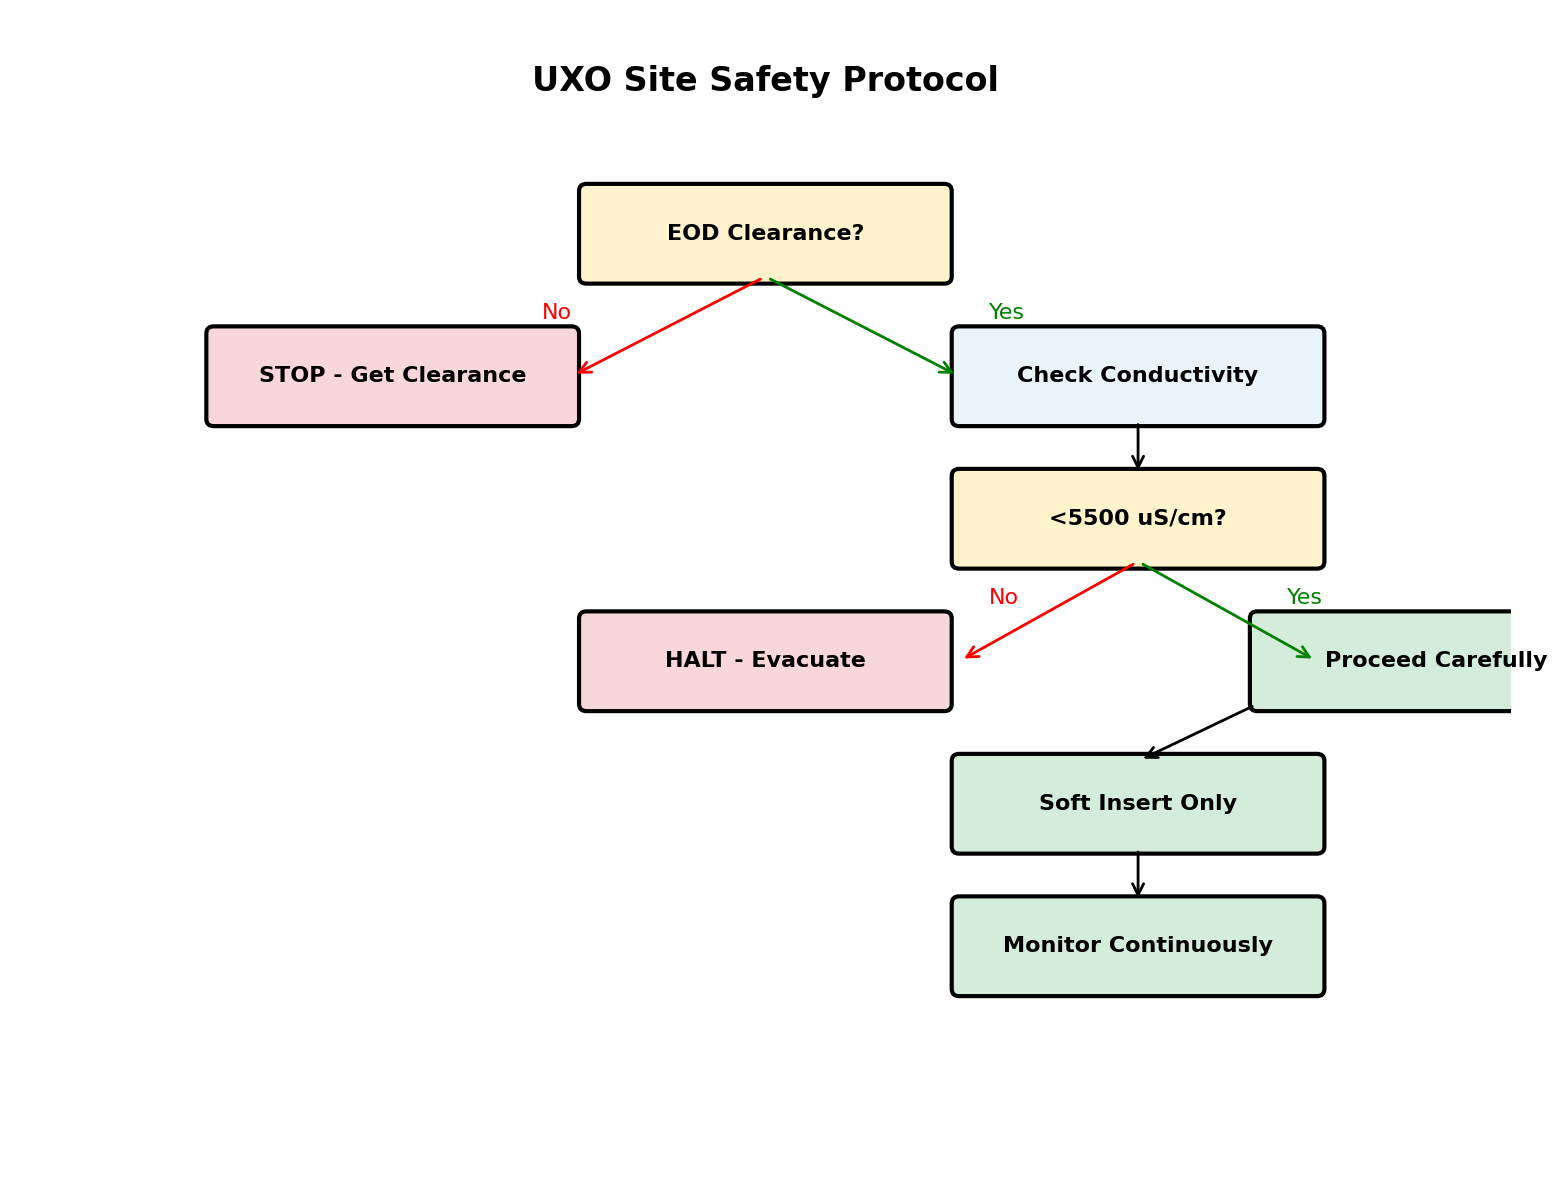

In [2]:
#| label: fig-safety-flowchart
#| fig-cap: UXO site safety protocol decision flowchart. Each survey must complete all safety checks before proceeding with probe insertion.
#| code-fold: true

import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 8)
ax.axis('off')

def add_box(ax, x, y, text, color='#e8f4f8'):
    box = FancyBboxPatch((x-1.2, y-0.3), 2.4, 0.6, boxstyle="round,pad=0.05",
                         facecolor=color, edgecolor='black', lw=1.5)
    ax.add_patch(box)
    ax.text(x, y, text, ha='center', va='center', fontsize=8, fontweight='bold')

ax.text(5, 7.5, 'UXO Site Safety Protocol', ha='center', fontsize=12, fontweight='bold')

add_box(ax, 5, 6.5, 'EOD Clearance?', '#fff3cd')
add_box(ax, 2.5, 5.5, 'STOP - Get Clearance', '#f8d7da')
add_box(ax, 7.5, 5.5, 'Check Conductivity', '#e8f4f8')
add_box(ax, 7.5, 4.5, '<5500 uS/cm?', '#fff3cd')
add_box(ax, 5, 3.5, 'HALT - Evacuate', '#f8d7da')
add_box(ax, 9.5, 3.5, 'Proceed Carefully', '#d4edda')
add_box(ax, 7.5, 2.5, 'Soft Insert Only', '#d4edda')
add_box(ax, 7.5, 1.5, 'Monitor Continuously', '#d4edda')

ax.annotate('', xy=(3.7, 5.5), xytext=(5, 6.2), arrowprops=dict(arrowstyle='->', color='red'))
ax.text(3.5, 5.9, 'No', fontsize=8, color='red')
ax.annotate('', xy=(6.3, 5.5), xytext=(5, 6.2), arrowprops=dict(arrowstyle='->', color='green'))
ax.text(6.5, 5.9, 'Yes', fontsize=8, color='green')
ax.annotate('', xy=(7.5, 4.8), xytext=(7.5, 5.2), arrowprops=dict(arrowstyle='->', color='black'))
ax.annotate('', xy=(6.3, 3.5), xytext=(7.5, 4.2), arrowprops=dict(arrowstyle='->', color='red'))
ax.text(6.5, 3.9, 'No', fontsize=8, color='red')
ax.annotate('', xy=(8.7, 3.5), xytext=(7.5, 4.2), arrowprops=dict(arrowstyle='->', color='green'))
ax.text(8.5, 3.9, 'Yes', fontsize=8, color='green')
ax.annotate('', xy=(7.5, 2.8), xytext=(8.3, 3.2), arrowprops=dict(arrowstyle='->', color='black'))
ax.annotate('', xy=(7.5, 1.8), xytext=(7.5, 2.2), arrowprops=dict(arrowstyle='->', color='black'))

plt.tight_layout()
plt.show()

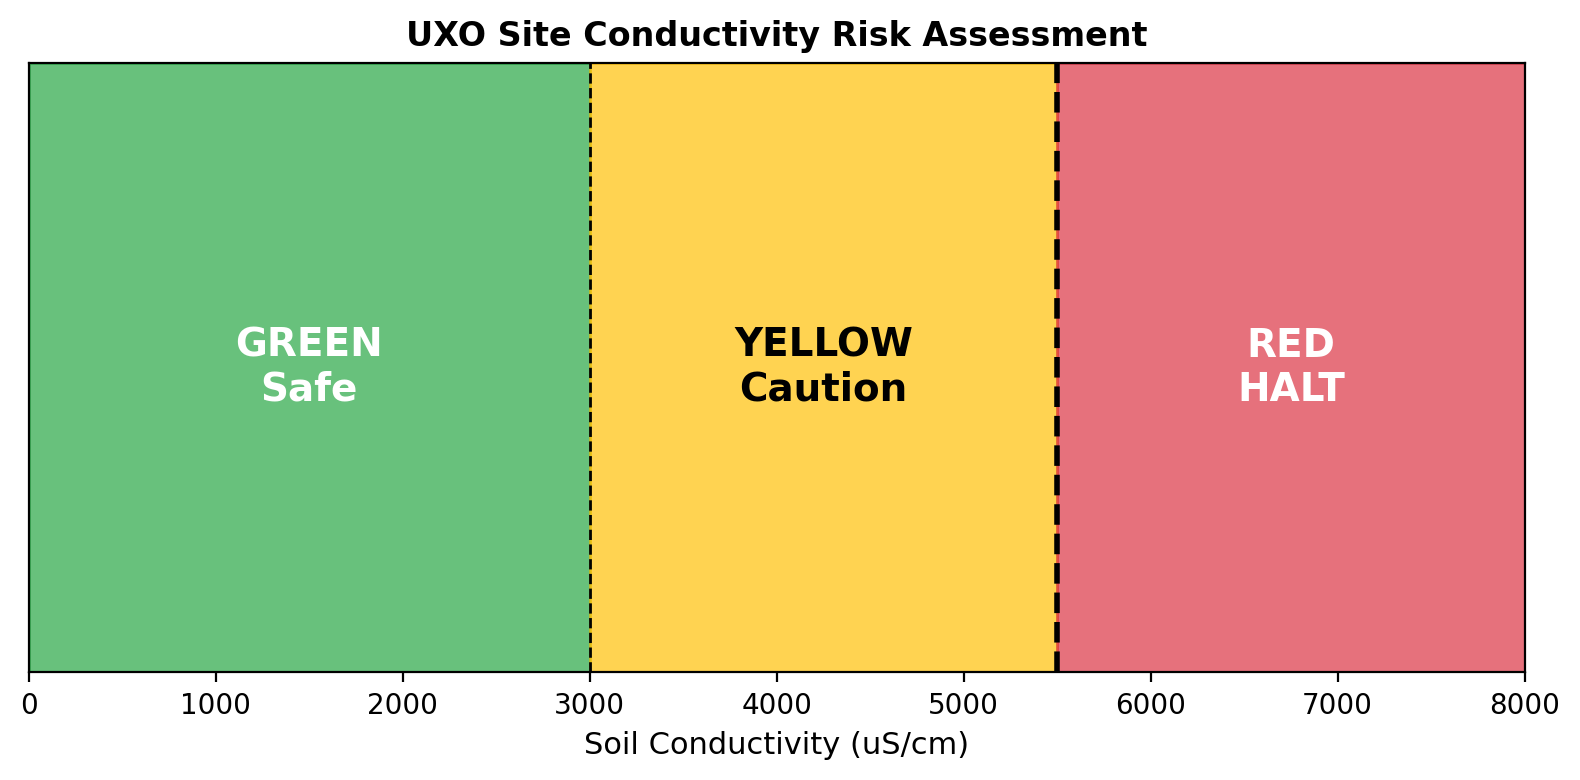

In [3]:
#| label: fig-risk-matrix
#| fig-cap: 'Conductivity-based risk assessment matrix. Operations must halt immediately if conductivity exceeds 5,500 uS/cm.'
#| code-fold: true

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 4))

zones = [
    (0, 3000, 'GREEN\nSafe', '#28a745'),
    (3000, 5500, 'YELLOW\nCaution', '#ffc107'),
    (5500, 8000, 'RED\nHALT', '#dc3545')
]

for start, end, label, color in zones:
    ax.axvspan(start, end, alpha=0.7, color=color)
    ax.text((start + end) / 2, 0.5, label, ha='center', va='center',
            fontsize=14, fontweight='bold', color='white' if color != '#ffc107' else 'black')

ax.set_xlim(0, 8000)
ax.set_ylim(0, 1)
ax.set_xlabel('Soil Conductivity (uS/cm)', fontsize=11)
ax.set_title('UXO Site Conductivity Risk Assessment', fontsize=12, fontweight='bold')
ax.set_yticks([])
ax.axvline(x=3000, color='black', linestyle='--', lw=1)
ax.axvline(x=5500, color='black', linestyle='--', lw=2)

plt.tight_layout()
plt.show()

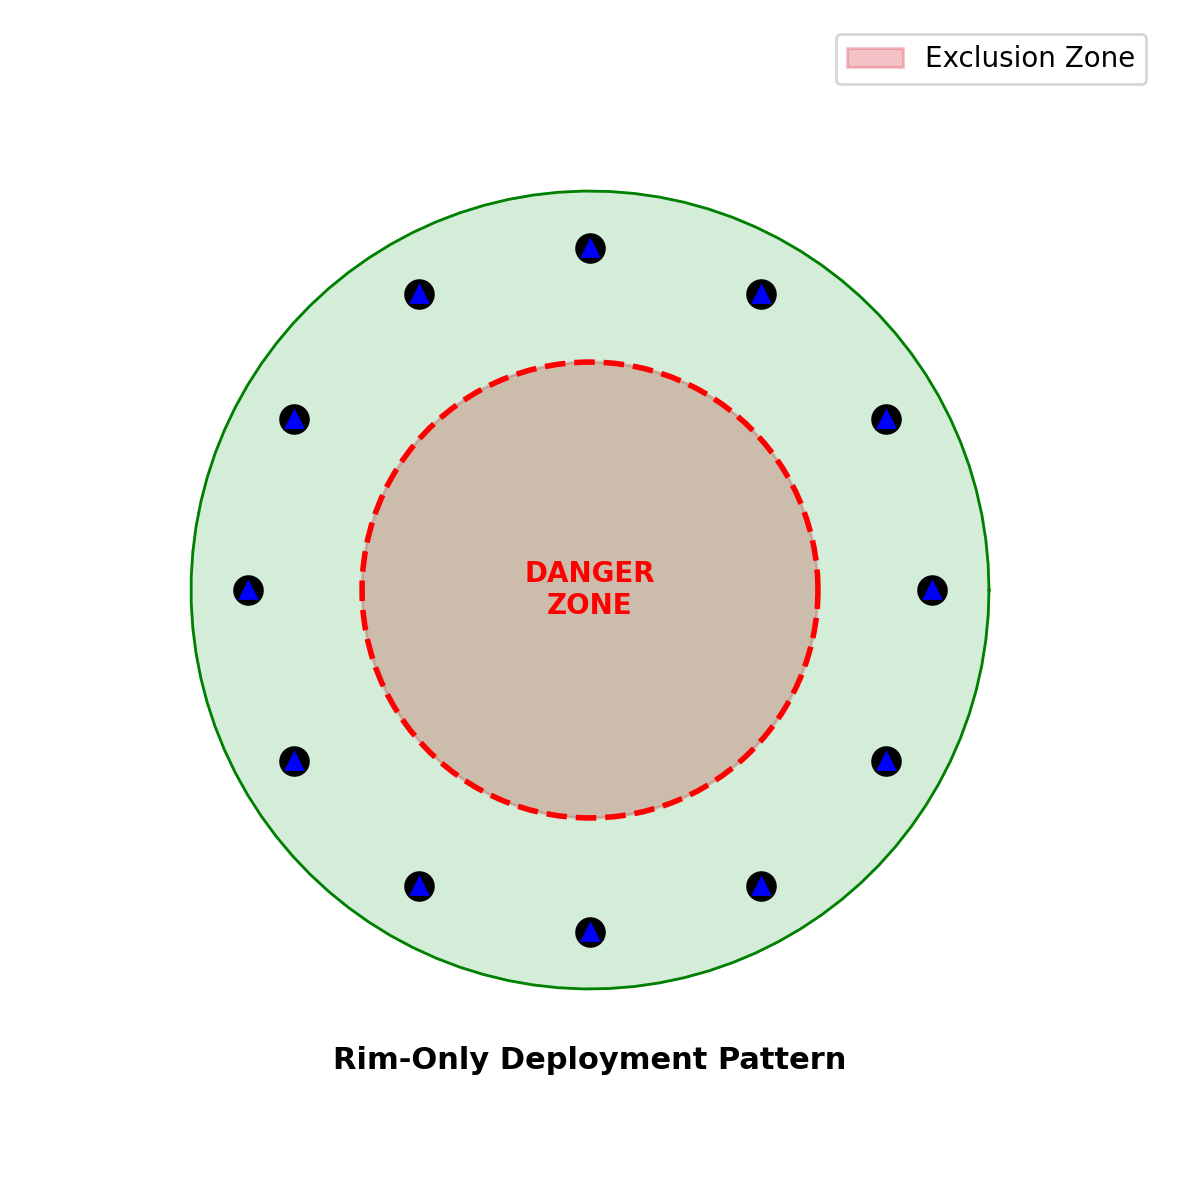

In [4]:
#| label: fig-rim-deployment
#| fig-cap: 'Rim-only deployment pattern for high-risk craters. Probes are positioned around the perimeter, maintaining safe standoff from the central exclusion zone.'
#| code-fold: true

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 6))

# Crater outline
theta = np.linspace(0, 2*np.pi, 100)
ax.fill(2*np.cos(theta), 2*np.sin(theta), color='#dc3545', alpha=0.3, label='Exclusion Zone')
ax.plot(2*np.cos(theta), 2*np.sin(theta), 'r--', lw=2)

# Safe deployment zone
ax.fill(3.5*np.cos(theta), 3.5*np.sin(theta), color='#28a745', alpha=0.2)
ax.plot(3.5*np.cos(theta), 3.5*np.sin(theta), 'g-', lw=1)

# Probes around perimeter
probe_angles = np.linspace(0, 2*np.pi, 12, endpoint=False)
for angle in probe_angles:
    x, y = 3*np.cos(angle), 3*np.sin(angle)
    ax.plot(x, y, 'ko', markersize=10)
    ax.plot(x, y, 'b^', markersize=6)

ax.text(0, 0, 'DANGER\nZONE', ha='center', va='center', fontsize=10, fontweight='bold', color='red')
ax.text(0, -4.2, 'Rim-Only Deployment Pattern', ha='center', fontsize=11, fontweight='bold')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')
ax.axis('off')
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

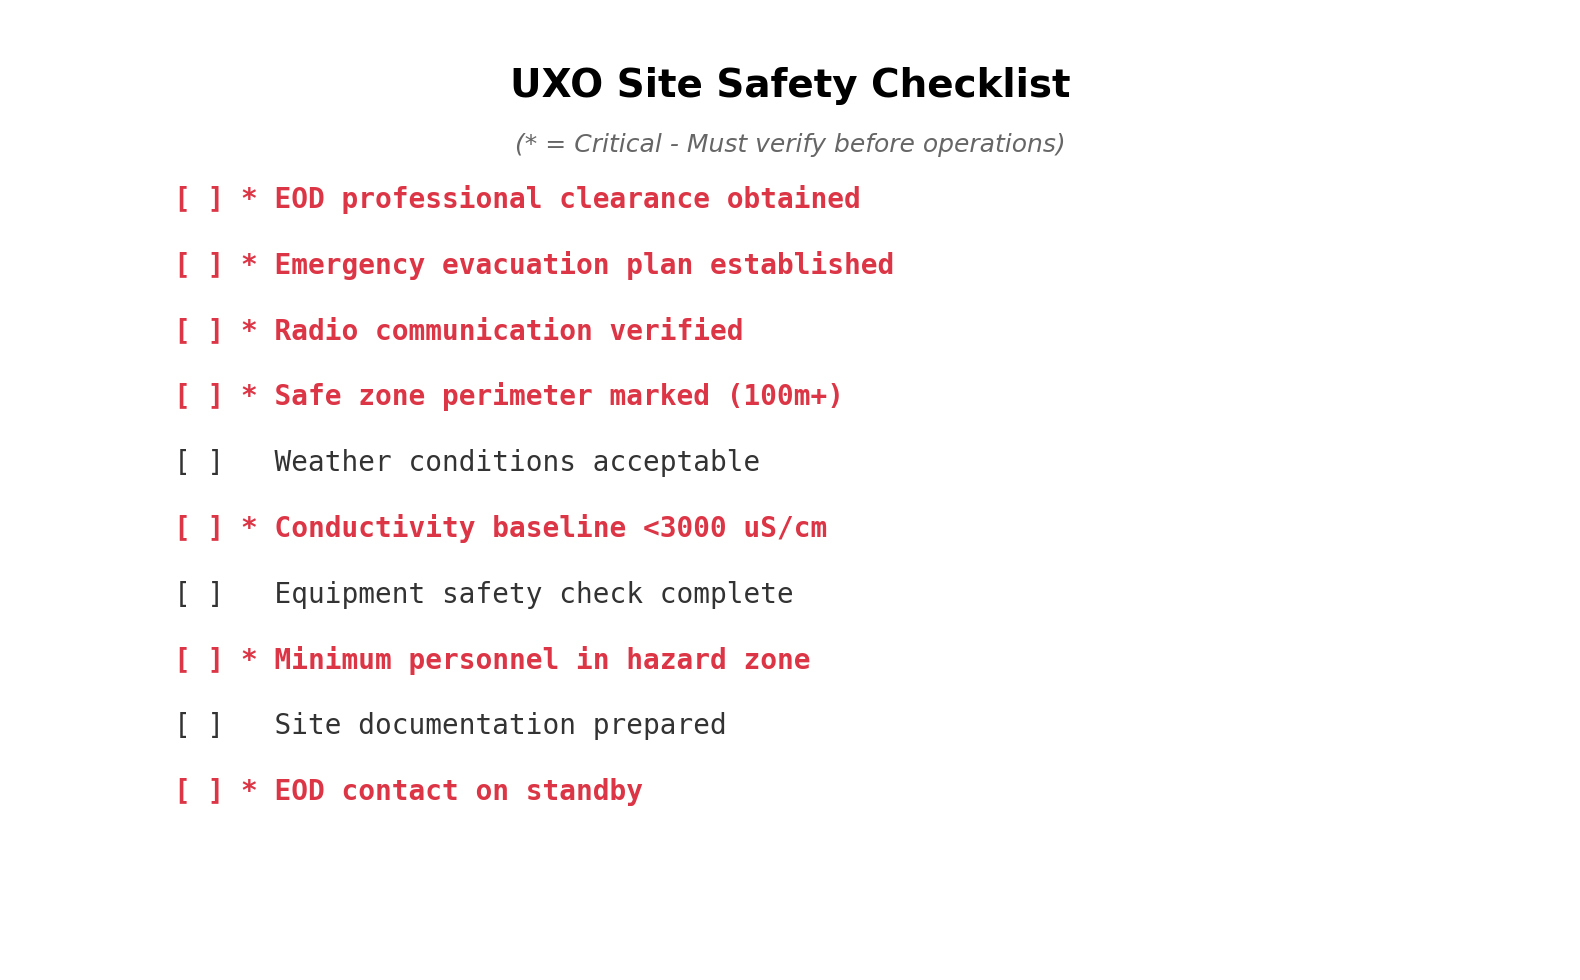

In [5]:
#| label: fig-safety-checklist
#| fig-cap: UXO site safety checklist. All critical items (marked with star) must be verified before operations commence.
#| code-fold: true

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
ax.axis('off')

checklist = [
    ('*', 'EOD professional clearance obtained', True),
    ('*', 'Emergency evacuation plan established', True),
    ('*', 'Radio communication verified', True),
    ('*', 'Safe zone perimeter marked (100m+)', True),
    ('', 'Weather conditions acceptable', False),
    ('*', 'Conductivity baseline <3000 uS/cm', True),
    ('', 'Equipment safety check complete', False),
    ('*', 'Minimum personnel in hazard zone', True),
    ('', 'Site documentation prepared', False),
    ('*', 'EOD contact on standby', True),
]

ax.text(0.5, 0.95, 'UXO Site Safety Checklist', ha='center', va='top',
        transform=ax.transAxes, fontsize=14, fontweight='bold')
ax.text(0.5, 0.88, '(* = Critical - Must verify before operations)', ha='center', va='top',
        transform=ax.transAxes, fontsize=9, style='italic', color='#666')

for i, (star, text, critical) in enumerate(checklist):
    y = 0.8 - i * 0.07
    color = '#dc3545' if critical else '#333'
    marker = '[ ] ' + star + ' ' if star else '[ ]   '
    ax.text(0.1, y, marker + text, transform=ax.transAxes, fontsize=10,
            fontfamily='monospace', color=color, fontweight='bold' if critical else 'normal')

plt.tight_layout()
plt.show()